<a href="https://colab.research.google.com/github/Rohit-Madhesiya/LangGraph-Implementations/blob/main/Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LangGraph**

LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows.\
Compared to other LLM frameworks, it offers these core benefits:

Cycles, Controllability, and Persistence.

LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions.

**Why LangGraph:** Bcz of its amazing benefits

**1. Simplifies the development:**
* State Management of the agent and Agents co-ordination

**2. Flexibility:**

With LangGraph, developers have the flexibility to define their own agent logic and communication protocols. This allows for highly customized applications tailored to specific use cases. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. It's all about giving you the power to create.


**3. Scalability:**

When building large scale multi-agent application => LangGraph handles high volume of Interaction and Complex Workflows => Enterprise->Level applications


**4. Fault Tolerance:**

LangGraph ables to handle Errors

---
**Chatbots with LangGraph**

In [34]:
!pip install langgraph langsmith

In [35]:
!pip install langchain langchain_community langchain_groq

In [65]:
import os
from google.colab import userdata
GROQ_API_KEY=userdata.get("GROQ_API_KEY")
LANGCHAIN_API_KEY=userdata.get("LANGCHAIN_API_KEY")
os.environ['LANGCHAIN_API_KEY']=LANGCHAIN_API_KEY
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ['LANGCHAIN_PROJECT']='Chatbot_using_LangGraph'

In [66]:
from langchain_groq import ChatGroq

llm=ChatGroq(groq_api_key=GROQ_API_KEY,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e6a55538350>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e6a55839690>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [67]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [68]:
class State(TypedDict):
  # `messages` have the type 'list'. The `add_messages()` in the annotation
  # defines how this state key should be updated
  # (in this case, it appends messages to the list, rather than overwritting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [69]:
graph_builder

In [70]:
def chatbot(state:State):
  return {
      "messages":llm.invoke(state['messages'])
  }

In [71]:
graph_builder.add_node("chatbot",chatbot)

In [72]:
graph_builder

In [73]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [74]:
graph=graph_builder.compile()

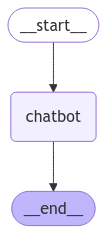

In [75]:
graph

In [76]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ['quit','q']:
    print("Bye,bye!!")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value['messages'].content)


User: Hi
dict_values([{'messages': AIMessage(content='Hi there! 👋 What can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001900897, 'queue_time': 0.017234332, 'total_time': 0.029173624}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e1d7a244-19e7-46c4-a5ee-982764efecd4-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hi there! 👋 What can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001900897, 'queue_time': 0.017234332, 'total_time': 0.029173624}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-e1d7a244-1